# Variable categórica

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City") 

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female" \
                , "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [11]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
coeflist = list(zip(feature_cols, lm.coef_))
coeflist

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [15]:
lm.score(X,Y) #Rcuadrado

0.9179923586131016

El modelo puede ser escrito como:
* Total_spend = -79.41713030137362 + coeflist[0][1] * monthly income + coeflist[1][1] * transaction time ...

In [16]:
df_new["prediccion"] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205738 +\
df_new['Transaction Time'] * 0.15494612549589545 +\
df_new['Gender_Female'] * -131.02501325554567 +\
df_new['Gender_Male'] * 131.0250132555456+\
df_new['City_Tier 1'] * 76.76432601049527+\
df_new['City_Tier 2'] * 55.138974309232474+\
df_new['City_Tier 3'] * -131.9033003197278+\
df_new['Record'] * 772.2334457445648

In [17]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediccion
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [18]:
SSD = np.sum( (df_new["prediccion"] - df_new["Total Spend"] ) ** 2 )  #Suma de los cuadrados de las diferencias
SSD

1517733985.3408163

In [19]:
RSE = np.sqrt(SSD / (len(df_new) - len(feature_cols) - 1)) #Desviación tipica de los residuos
RSE

803.1318809818165

In [20]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [21]:
error = RSE * 100 / sales_mean
error

13.031135680294161

## Forma más rápida para realizar la predicción

In [22]:
df_new["prediccion"] = lm.predict(pd.DataFrame(df_new[feature_cols]))
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediccion
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


## Eliminar dummies redundantes

In [23]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:, 1:]

In [24]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [25]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:, 1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [26]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [27]:
feature_cols = ["Monthly Income", "Transaction Time", "Record", "Gender_Male", "City_Tier 2", "City_Tier 3"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(lm.intercept_)

-133.67781754641965


In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589898),
 ('Record', 772.2334457445633),
 ('Gender_Male', 262.05002651109305),
 ('City_Tier 2', -21.62535170126252),
 ('City_Tier 3', -208.66762633022327)]

In [30]:
lm.score(X,Y)

0.9179923586131016

## Transformación de variables para conseguir una transformación no lineal

In [31]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [32]:
data_auto.shape

(406, 9)

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

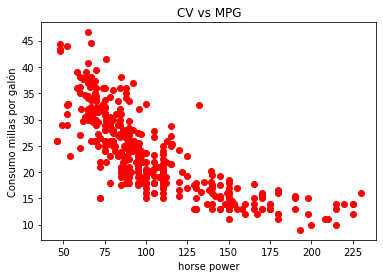

In [36]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("horse power")
plt.ylabel("Consumo millas por galón")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [49]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [50]:
lm = LinearRegression()
lm.fit(X_data,Y) #cambiamos el tipo de dato de X

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
type(X)

pandas.core.series.Series

In [52]:
type(X_data)

numpy.ndarray

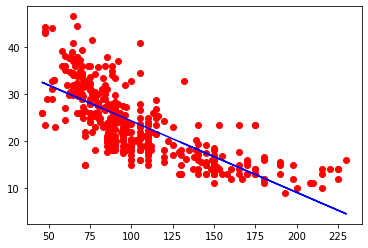

In [53]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [54]:
lm.score(X_data, Y) #Su R^2 no es bajo

0.574653340645025

In [56]:
SSD = np.sum((Y - lm.predict(X_data)) ** 2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, error

(10315.75196006092, 5.046879480825511, 0.21462773361633458)

## Modelo de regresión cuadrático
* mpg = a + b x horsepower^2

In [57]:
X_data = X**2

In [58]:
X_data = X_data[:, np.newaxis]

In [59]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lm.score(X_data, Y)

0.4849887034823205

In [61]:
SSD = np.sum((Y - lm.predict(X_data)) ** 2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, error

(12490.350340501926, 5.553410772769817, 0.236168898529981)

## Modelo de regresión lineal y cuadrático
*mpg = a + b x horsepower + c x horsepower ^ 2

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [63]:
poly = PolynomialFeatures(degree = 2)

In [64]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [65]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lm.score(X_data,Y )  #aumentará el R^2

0.6439066584257469

In [67]:
lm.intercept_

55.026192447080355

In [73]:
lm.coef_

array([ 0.00000000e+00,  4.00021432e+00, -7.54801920e-02,  6.19621369e-04,
       -2.36220932e-06,  3.41982935e-09])

In [74]:
def regression_validation(lm, X_data, Y):
    SSD = np.sum((Y - lm.predict(X_data)) ** 2)
    RSE = np.sqrt(SSD / (len(X_data) - 1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    return SSD, RSE, error

mpg = 55.026192447080355 - 0.43404318 horsepower + 0.00112615 horsepower ^ 2

In [75]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d), end=":")
    print(lm.score(X_data,Y ), end=" ")
    print(lm.intercept_, end=" ")
    print(lm.coef_, end=" ")
    print(regression_validation(lm, X_data, Y))

Regresión de grado 2:0.6439066584257469 55.026192447080355 [ 0.         -0.43404318  0.00112615] (8636.180643524502, 4.61778115803654, 0.1963795466190689)
Regresión de grado 3:0.6444678885560744 58.448774111918084 [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06] (8622.56936742855, 4.614140736300908, 0.19622473106036675)
Regresión de grado 4:0.6467674189704502 40.096643848138505 [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08] (8566.799832491353, 4.5991947315797574, 0.19558912501268777)
Regresión de grado 5:0.6547512489366876 -40.693812896755176 [ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09] (8373.171393636556, 4.546921735442387, 0.19336612073193882)


## Outliers
Puntos que distorcionan el modelo

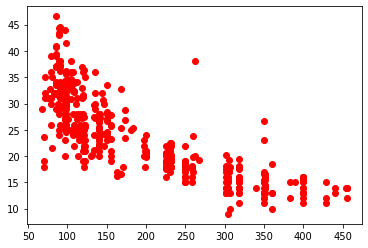

In [79]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [80]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm=LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lm.score(X, Y)

0.6261049762826918

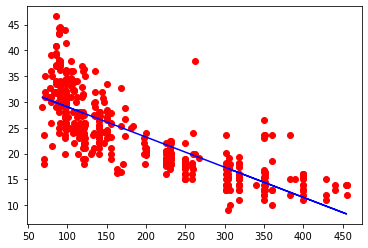

In [82]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")

In [ ]:
data_auto.iloc